In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('white')

In [13]:
columns_names = ['user_id', 'item_id', 'ratings', 'timestamp']

In [14]:
df = pd.read_csv('https://raw.githubusercontent.com/juinc/python_data_science_and_machine_learning_bootcamp/master/Machine%20Learning%20Sections/Recommender-Systems/u.data', sep= '\t',
                 names=columns_names)

In [15]:
df.head()

,user_id,item_id,ratings,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [16]:
movies_title = pd.read_csv('https://raw.githubusercontent.com/juinc/python_data_science_and_machine_learning_bootcamp/master/Machine%20Learning%20Sections/Recommender-Systems/Movie_Id_Titles')

In [17]:
movies_title.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [18]:
df = pd.merge(df, movies_title, on= 'item_id')

In [22]:
df.head()

,user_id,item_id,ratings,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [30]:
df.groupby('title')['ratings'].count().sort_values(ascending = False).head(20)

title
Star Wars (1977)                    584
Contact (1997)                      509
Fargo (1996)                        508
Return of the Jedi (1983)           507
Liar Liar (1997)                    485
English Patient, The (1996)         481
Scream (1996)                       478
Toy Story (1995)                    452
Air Force One (1997)                431
Independence Day (ID4) (1996)       429
Raiders of the Lost Ark (1981)      420
Godfather, The (1972)               413
Pulp Fiction (1994)                 394
Twelve Monkeys (1995)               392
Silence of the Lambs, The (1991)    390
Jerry Maguire (1996)                384
Chasing Amy (1997)                  379
Rock, The (1996)                    378
Empire Strikes Back, The (1980)     368
Star Trek: First Contact (1996)     365
Name: ratings, dtype: int64

In [34]:
ratings = pd.DataFrame(df.groupby('title')['ratings'].mean())

In [36]:
ratings['Num of ratings'] = pd.DataFrame(df.groupby('title')['ratings'].count())

In [37]:
ratings.head()

,ratings,Num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


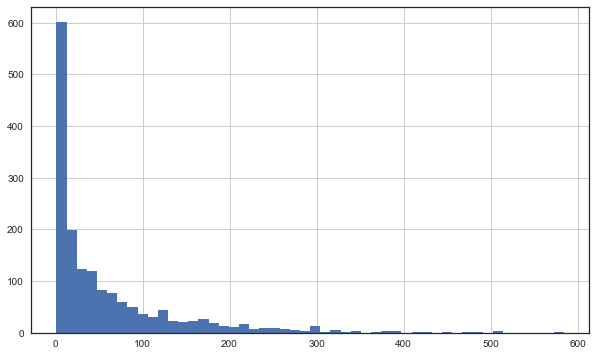

In [52]:
fig = plt.figure(figsize=(10,6))
ratings['Num of ratings'].hist(bins = 50)


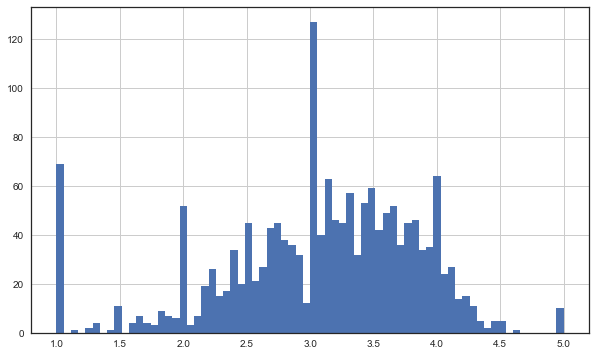

In [50]:
#sns.set_style('white')
fig = plt.figure(figsize=(10,6))
ratings['ratings'].hist(bins = 70)

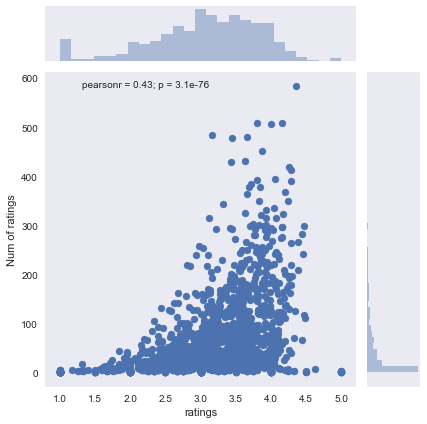

In [57]:
sns.set_style('dark')
sns.jointplot(x ='ratings' , y ='Num of ratings' , data = ratings)

In [61]:
moviemat = df.pivot_table(index = 'user_id', columns='title', values = 'ratings')

In [60]:
ratings.sort_values('Num of ratings', ascending=False).head(20)

,ratings,Num of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [67]:
star_wars_ratings = moviemat['Star Wars (1977)']
fargo_ratings = moviemat['Fargo (1996)']

In [68]:
fargo_ratings.head()

user_id
0    NaN
1    5.0
2    5.0
3    NaN
4    NaN
Name: Fargo (1996), dtype: float64

In [69]:
similar_star_wars = moviemat.corrwith(star_wars_ratings)

In [70]:
similar_to_fargo = moviemat.corrwith(fargo_ratings)

In [72]:
corr_starwars = pd.DataFrame(similar_star_wars, columns=['Correlations'])

In [74]:
corr_starwars.dropna(inplace=True)

In [78]:
corr_starwars.sort_values('Correlations', ascending=False)

,Correlations
title,
Hollow Reed (1996),1.000000
Commandments (1997),1.000000
Cosi (1996),1.000000
No Escape (1994),1.000000
Stripes (1981),1.000000
Star Wars (1977),1.000000
Man of the Year (1995),1.000000
"Beans of Egypt, Maine, The (1994)",1.000000
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.000000


In [80]:
corr_starwars = corr_starwars.join(ratings['Num of ratings'])

In [82]:
corr_starwars.head()

,Correlations,Num of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [85]:
corr_starwars[corr_starwars['Num of ratings']>100].sort_values('Correlations', 
                                                               ascending =False)

,Correlations,Num of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331
Pinocchio (1940),0.347868,101
"Frighteners, The (1996)",0.332729,115


In [86]:
corr_fargo = pd.DataFrame(similar_to_fargo, columns=['correlation'])

In [88]:
corr_fargo.dropna(inplace=True)

In [89]:
corr_fargo = corr_fargo.join(ratings['Num of ratings'])

In [96]:
corr_fargo[corr_fargo['Num of ratings']>50].sort_values('correlation', ascending = False)

,correlation,Num of ratings
title,,
Fargo (1996),1.000000,508
Eve's Bayou (1997),0.658512,64
"MatchMaker, The (1997)",0.605783,51
To Die For (1995),0.551740,87
Bullets Over Broadway (1994),0.491990,86
Soul Food (1997),0.451683,59
Dolores Claiborne (1994),0.451390,79
Night of the Living Dead (1968),0.445695,64
Koyaanisqatsi (1983),0.438393,53
